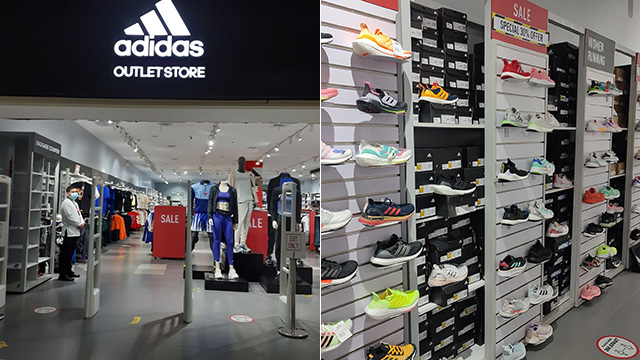

**DATA DESCRIPTION**
>
The data set was gotten from Kaggle and can be accessed using this [link](https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset/code). It is a collection of data that includes information on the sales of Adidas products. This dataset includes details such as the number of units sold, the total sales revenue, the location of the sales, the type of product sold, and any other relevant information. the dataset consists of 9652 rows and 12 columns.

**BUSINESS QUESTIONS**

What is the breakdown of sales by retailers, and how does it vary across different retailers?
How does the total profit of retailers compare and vary across different retailers?
1. What is the breakdown of sales by Product?
2. What is the top sales method?
3. What is the average price of products per unit?
4. Are there macro trends in sales?



In [82]:
#import the packages

import pandas as pd

#math
import numpy as np

#visualization
import matplotlib.pyplot as plt

# model selection
from sklearn.model_selection import train_test_split

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler()

#regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#metrics
from sklearn import metrics



In [83]:

import plotly.express as px
import seaborn as sns

# **Loading the dataset**

In [84]:

adidas = pd.read_excel('adidas dataset.xlsx')
adidas.head(5)

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   

  Sales Method                    Product  Price per Unit  Units Sold  \
0     In-store      Men's Street Footwear            50.0        1200   
1     In-store    Men's Athletic Footwear            50.0        1000   
2     In-store    Women's Street Footwear            40.0        1000   
3     In-store  Women's Athletic Footwear            45.0         850   
4     In-store              Men's Apparel            60.0         900   

   Operating Profit  Total Sales  
0           30000.0      60000.0  
1           15000.0      50000.0  
2           14000.0      40000.0  
3           13387.5      38250.0  
4           16200.0      54000.0

In [85]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Sales Method      9648 non-null   object        
 7   Product           9648 non-null   object        
 8   Price per Unit    9646 non-null   float64       
 9   Units Sold        9648 non-null   int64         
 10  Operating Profit  9648 non-null   float64       
 11  Total Sales       9648 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 904.6+ KB


In [86]:
#check for duplicated
adidas.duplicated().sum()

0

In [87]:
#check null value
adidas.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Sales Method        0
Product             0
Price per Unit      2
Units Sold          0
Operating Profit    0
Total Sales         0
dtype: int64

In [88]:
#drop null values
adidas.dropna(inplace=True)

In [89]:
adidas.describe()

Retailer ID                   Invoice Date  Price per Unit  \
count  9.646000e+03                           9646     9646.000000   
mean   1.173846e+06  2021-05-10 17:13:11.955214592       45.215633   
min    1.128299e+06            2020-01-01 00:00:00        7.000000   
25%    1.185732e+06            2021-02-17 00:00:00       35.000000   
50%    1.185732e+06            2021-06-04 00:00:00       45.000000   
75%    1.185732e+06            2021-09-16 00:00:00       55.000000   
max    1.197831e+06            2021-12-31 00:00:00      110.000000   
std    2.636170e+04                            NaN       14.706055   

        Units Sold  Operating Profit   Total Sales  
count  9646.000000       9646.000000   9646.000000  
mean    256.843355       3441.030079   9321.917116  
min       0.000000          0.000000      0.000000  
25%     106.000000        192.169750    425.150000  
50%     176.000000        436.950000    957.600000  
75%     350.000000       5200.000000  15000.000000  
max    1275.000000      39000.000000  82500.000000  
std     214.174812       5418.465454  14186.311316

### **Looking for Correlations**

Before proceeding with the data cleaning, it is useful to establish a correlation between the response variable (in our case the sale price) and other predictor variables, as some of them might not have any major impact in determining the total sale and will not be used in the analysis.  There are many ways to discover correlation between the target variable and the rest of the features. Building pair plots, scatter plots, heat maps, and a correlation matrixes are the most common ones. Below, we will use the `corr()` function to list the top features based on the [pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) (measures how closely two sequences of numbers are correlated). Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.


In [90]:
df_num = adidas.select_dtypes(include = ['float64', 'int64'])
df_num_corr = df_num.corr()['Total Sales'][:-1] # -1 means that the latest row is SalePrice
top_features = df_num_corr[abs(df_num_corr) > 0.4].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 3 strongly correlated values with SalePrice:
Operating Profit    0.956308
Units Sold          0.913359
Price per Unit      0.435765
Name: Total Sales, dtype: float64


Above, there are 3 features, with coefficients greater than 0.4, that are strongly correlated with the Total sales. 

Next, let's generate some par plots to visually inspect the correlation between some of these features and the target variable. We will use seaborns `sns.pairplot()` function for this analysis. Also, building pair plots is one of the possible ways to spot the outliers that might be present in the data.


In [91]:
#filter to where the unit sold are grater than zero
df = adidas[adidas['Units Sold'] > 0]

Will format invoice date to date str and add year and month columns from invoice date for better analysis

In [92]:
#additional columns
df['Year']=pd.to_datetime(df['Invoice Date']).dt.year
df['Month']=pd.to_datetime(df['Invoice Date']).dt.strftime('%B')
df[['Price per Unit','Units Sold','Total Sales','Operating Profit']]=df[['Price per Unit','Units Sold','Total Sales','Operating Profit']].astype('Float64')

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 9642 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9642 non-null   object        
 1   Retailer ID       9642 non-null   int64         
 2   Invoice Date      9642 non-null   datetime64[ns]
 3   Region            9642 non-null   object        
 4   State             9642 non-null   object        
 5   City              9642 non-null   object        
 6   Sales Method      9642 non-null   object        
 7   Product           9642 non-null   object        
 8   Price per Unit    9642 non-null   Float64       
 9   Units Sold        9642 non-null   Float64       
 10  Operating Profit  9642 non-null   Float64       
 11  Total Sales       9642 non-null   Float64       
 12  Year              9642 non-null   int32         
 13  Month             9642 non-null   object        
dtypes: Float64(4), datetime64[ns]

C:\Users\Joshua\AppData\Local\Temp\ipykernel_11780\2521898870.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Joshua\AppData\Local\Temp\ipykernel_11780\2521898870.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Joshua\AppData\Local\Temp\ipykernel_11780\2521898870.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   

  Sales Method                    Product  Price per Unit  Units Sold  \
0     In-store      Men's Street Footwear            50.0      1200.0   
1     In-store    Men's Athletic Footwear            50.0      1000.0   
2     In-store    Women's Street Footwear            40.0      1000.0   
3     In-store  Women's Athletic Footwear            45.0       850.0   
4     In-store              Men's Apparel            60.0       900.0   

   Operating Profit  Total Sales  Year    Month  
0           30000.0      60000.0  2020  January  
1           15000.0      50000.0  2020  January  
2           14000.0      40000.0  2020  January  
3           13387.5      38250.0  2020  January  
4           16200.0      54000.0  2020  January

In [93]:
df['Profit Margin']= df['Operating Profit'] / df['Total Sales']
df.head()

C:\Users\Joshua\AppData\Local\Temp\ipykernel_11780\790254607.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   

  Sales Method                    Product  Price per Unit  Units Sold  \
0     In-store      Men's Street Footwear            50.0      1200.0   
1     In-store    Men's Athletic Footwear            50.0      1000.0   
2     In-store    Women's Street Footwear            40.0      1000.0   
3     In-store  Women's Athletic Footwear            45.0       850.0   
4     In-store              Men's Apparel            60.0       900.0   

   Operating Profit  Total Sales  Year    Month  Profit Margin  
0           30000.0      60000.0  2020  January            0.5  
1           15000.0      50000.0  2020  January            0.3  
2           14000.0      40000.0  2020  January           0.35  
3           13387.5      38250.0  2020  January           0.35  
4           16200.0      54000.0  2020  January            0.3

In [94]:
#what is the total units sold per month of the year
df.groupby(["Year", "Month"])["Units Sold"].sum()


Year  Month    
2020  April         54709.0
      August        62307.0
      December      20545.0
      February      37846.0
      January       47483.0
      July          37719.0
      June          16269.0
      March         46972.0
      May           35705.0
      November      25152.0
      October       30167.0
      September     46125.0
2021  April        161717.0
      August       195414.0
      December     171246.0
      February     156113.0
      January      179299.0
      July         180481.0
      June         164745.0
      March        143988.0
      May          178900.0
      November     149350.0
      October      152834.0
      September    182425.0
Name: Units Sold, dtype: Float64

In [95]:
# Convert to pivot table
# What's the total sales per month of each year
df.pivot_table(index = "Year", columns ="Month", values = "Total Sales", aggfunc = "sum")

Month      April     August   December   February    January       July  \
Year                                                                      
2020   2460700.6  1987798.0   802652.7  1499798.8  1574374.6  1694601.3   
2021   4773296.4  7228822.1  7781543.0  4610216.5  5522539.6  7833468.1   

Month       June      March        May   November    October  September  
Year                                                                     
2020    882981.9  1766057.7  1691801.4   862230.0  1083626.9  1830443.6  
2021   6591755.3  3914853.2  6358968.1  5923504.0  5307476.4  5935702.3

In [96]:
# Convert to pivot table
# What's the profit magin per month of each year
df.pivot_table(index = "Year", columns ="Retailer", values = "Profit Margin", aggfunc = "mean")

Retailer    Amazon  Foot Locker    Kohl's  Sports Direct  Walmart  West Gear
Year                                                                        
2020          <NA>     0.407232   0.46375       0.433143  0.42463    0.38948
2021      0.417871      0.41946  0.418943       0.445607    0.397   0.428217

In [97]:
# Analysis by retailer
df.pivot_table(index = ["Year", "Month"], columns = "Retailer", values = "Total Sales", aggfunc = "sum")

Retailer          Amazon  Foot Locker     Kohl's  Sports Direct   Walmart  \
Year Month                                                                  
2020 April          <NA>      80686.2       <NA>           <NA>  857711.7   
     August         <NA>     635384.5       <NA>       257399.3  812308.7   
     December       <NA>     268914.3    75850.3           <NA>      <NA>   
     February       <NA>     502771.2       <NA>           <NA>      <NA>   
     January        <NA>     934293.0       <NA>           <NA>      <NA>   
     July           <NA>         <NA>       <NA>       312472.3   73604.0   
     June           <NA>         <NA>       <NA>           <NA>      <NA>   
     March          <NA>    1034421.9       <NA>           <NA>      <NA>   
     May            <NA>     114238.6       <NA>       211748.5  439884.8   
     November       <NA>     302595.8       <NA>           <NA>      <NA>   
     October        <NA>     125069.8       <NA>       460886.5  497670.6   
     September      <NA>     238305.2       <NA>       263603.5  607320.2   
2021 April      394298.7     802690.2  1241031.9      1392320.3  208252.6   
     August     771443.6    1747169.8   632931.6      1988208.6  751342.1   
     December   971570.7    2613557.7   736453.4      1557739.1  248913.8   
     February   464563.1     956525.4  1095492.0       657513.1   26157.0   
     January    391361.6    1070659.6   935203.5       725958.4      <NA>   
     July       855326.7    2572368.6   650678.6      1122609.8  771029.9   
     June       747652.3    2262549.9   581657.9       930395.6  486022.4   
     March      412851.6     839492.5   989657.9       971621.2   46665.2   
     May        628707.1    1278350.4  1738595.9      1361508.5  273052.0   
     November   899298.0    1715800.4   596589.0      1163286.8  439785.4   
     October    655396.0    1052924.0   454077.2      1978629.7  409023.7   
     September  577421.8     809703.0   483256.1      2871198.5  507096.9   

Retailer        West Gear  
Year Month                 
2020 April      1522302.7  
     August      282705.5  
     December    457888.1  
     February    997027.6  
     January     640081.6  
     July       1308525.0  
     June        882981.9  
     March       731635.8  
     May         925929.5  
     November    559634.2  
     October         <NA>  
     September   721214.7  
2021 April       734702.7  
     August     1337726.4  
     December   1653308.3  
     February   1409965.9  
     January    2399356.5  
     July       1861454.5  
     June       1583477.2  
     March       654564.8  
     May        1078754.2  
     November   1108744.4  
     October     757425.8  
     September   687026.0

In [98]:
# Analysis by retailer
df.pivot_table(index = ["Year", "Month"], columns = "Product", values = "Total Sales", aggfunc = "sum")

Product         Men's Apparel  Men's Athletic Footwear  Men's Street Footwear  \
Year Month                                                                      
2020 April           378959.9                 419744.4               540324.4   
     August          306905.7                 420158.6               324495.9   
     December        101807.9                 106523.9               211142.1   
     February        228464.1                 305592.8               288277.6   
     January         177836.2                 263995.8               385949.5   
     July            215569.6                 309329.2               384009.6   
     June             84658.8                 154196.7               183145.0   
     March           222446.7                 317629.9               368379.0   
     May             299295.1                 291382.0               320913.7   
     November         90631.3                 168499.6               225813.9   
     October         168161.2                 148204.0               199448.7   
     September       275959.9                 274189.3               350402.6   
2021 April           611487.8                 774480.5              1139975.3   
     August          870852.7                1397479.1              1860703.0   
     December       1065872.6                1319503.8              1895384.8   
     February        694691.7                 783921.4              1131655.9   
     January         796505.6                1045167.8              1173470.0   
     July           1076535.0                1296898.8              1924465.7   
     June            863118.2                 972588.6              1540231.9   
     March           534992.5                 674339.7               959096.3   
     May             847389.6                 994768.8              1543543.1   
     November        948722.3                 845529.0              1247481.2   
     October         693613.3                 923671.8              1255722.2   
     September       747385.5                1159572.5              1428593.0   

Product         Women's Apparel  Women's Athletic Footwear  \
Year Month                                                   
2020 April             493108.1                   293166.9   
     August            374875.8                   268760.0   
     December          169046.4                   118895.5   
     February          211386.1                   218193.8   
     January           306671.3                   199018.1   
     July              329171.6                   218652.5   
     June              185749.3                   115050.1   
     March             357036.8                   237932.7   
     May               332257.0                   216004.4   
     November          141884.4                    79481.9   
     October           234277.1                   153102.0   
     September         383569.3                   244731.3   
2021 April            1019989.8                   518874.7   
     August           1222818.6                   813907.7   
     December         1491070.8                   954996.2   
     February          829579.4                   502966.0   
     January          1028661.5                   635715.6   
     July             1623310.9                   863358.4   
     June             1551991.7                   759356.2   
     March             671495.0                   474177.4   
     May              1365830.7                   726964.1   
     November         1362970.6                   792234.0   
     October          1105140.5                   619133.5   
     September        1111993.3                   638516.6   

Product         Women's Street Footwear  
Year Month                               
2020 April                     335396.9  
     August                    292602.0  
     December                   95236.9  
     February                  247884.4  
     January                

In [99]:
df[["Retailer", "Retailer ID"]].drop_duplicates().sort_values("Retailer")

Retailer  Retailer ID
1148         Amazon      1185732
2007    Foot Locker      1197831
1287    Foot Locker      1128299
0       Foot Locker      1185732
212          Kohl's      1189833
2147         Kohl's      1128299
1499         Kohl's      1185732
2786         Kohl's      1197831
766   Sports Direct      1185732
68    Sports Direct      1197831
1355  Sports Direct      1128299
1333        Walmart      1128299
46          Walmart      1185732
90          Walmart      1197831
140       West Gear      1128299
725       West Gear      1185732
2012      West Gear      1197831

In [100]:
data = df[["Retailer", "Retailer ID", "Year", "Month"]].drop_duplicates().sort_values(["Retailer", "Month"])
print(data)

       Retailer  Retailer ID  Year      Month
1237     Amazon      1185732  2021      April
1261     Amazon      1185732  2021     August
1189     Amazon      1185732  2021   December
1225     Amazon      1185732  2021   February
1224     Amazon      1185732  2021    January
...         ...          ...   ...        ...
2714  West Gear      1197831  2021    October
748   West Gear      1185732  2020  September
1479  West Gear      1185732  2021  September
1911  West Gear      1128299  2021  September
2775  West Gear      1197831  2021  September

[211 rows x 4 columns]


In [101]:
#count all the retailer ID per month of the year
data.pivot_table(index = ["Year", "Month"], values = "Retailer ID", aggfunc = "count")

Retailer ID
Year Month                 
2020 April                4
     August               5
     December             3
     February             2
     January              2
     July                 3
     June                 1
     March                2
     May                  4
     November             2
     October              3
     September            4
2021 April               15
     August              16
     December            13
     February            15
     January             14
     July                15
     June                13
     March               15
     May                 15
     November            14
     October             16
     September           15

<Axes: xlabel='Year,Month'>

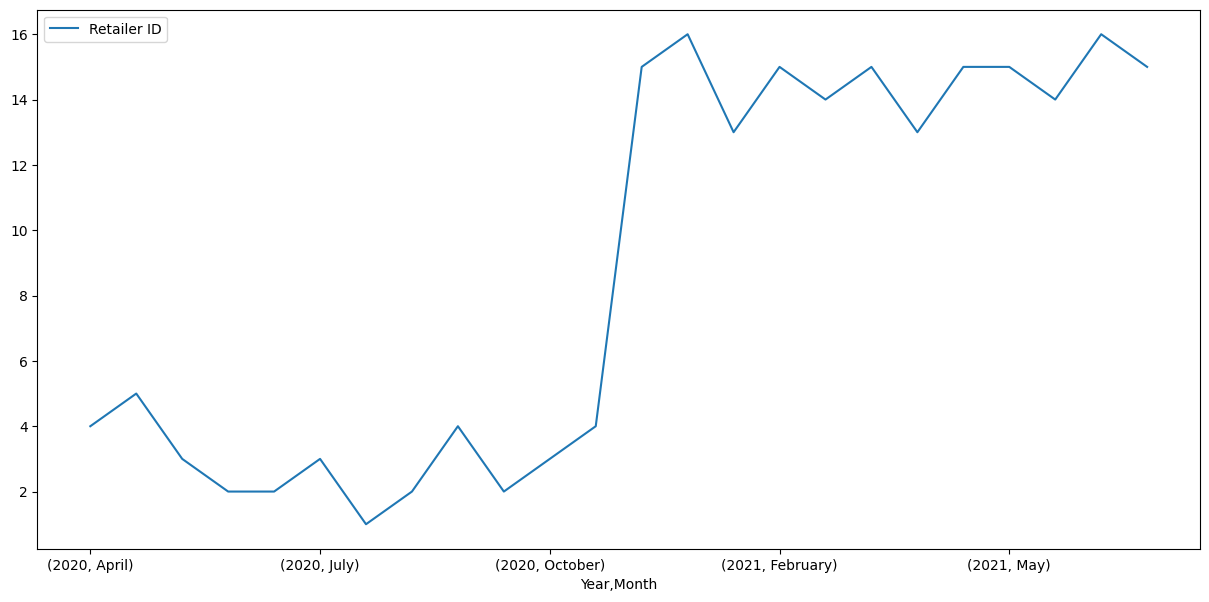

In [102]:
data.pivot_table(index = ["Year", "Month"], values = "Retailer ID", aggfunc = "count").plot(kind = "line", figsize = (15,7))

### Exploratory Data Analytics (EDA)

In [103]:
# profit per Profit method vs region
fig = px.box(df, x='Sales Method', y='Operating Profit', color = "Region", title="Profit per Total sales method vs region")
fig.update_traces(quartilemethod="exclusive")
fig.show()

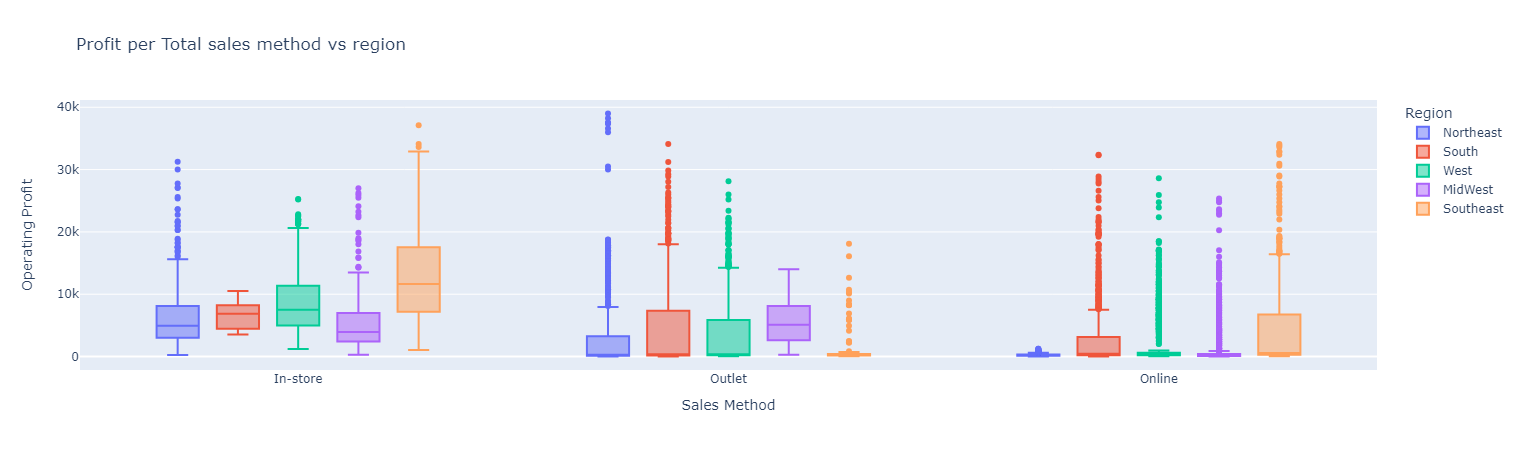

In [104]:
# profit per Total sales method vs region
fig = px.box(df, x='Sales Method', y='Total Sales', color = "Region", title=" Total sales method vs region")
fig.update_traces(quartilemethod="exclusive")
fig.show()

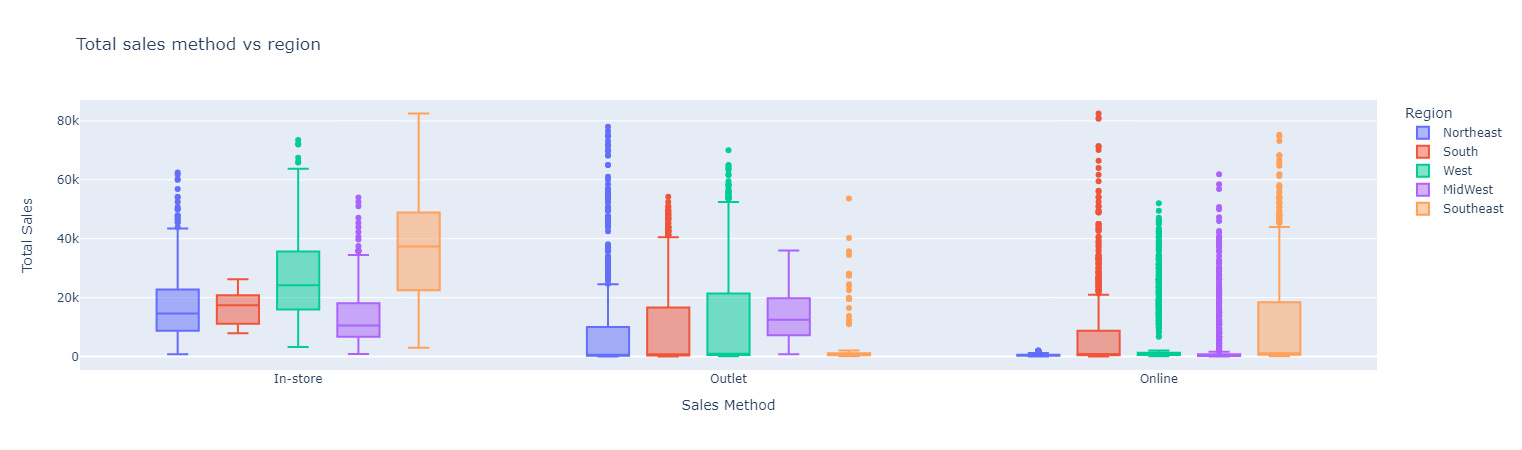

In [105]:
#Total sales per date vs sales method'
fig = px.bar(df, x="Invoice Date", y="Total Sales", color="Sales Method",      
              title='Total sales per date vs sales method')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

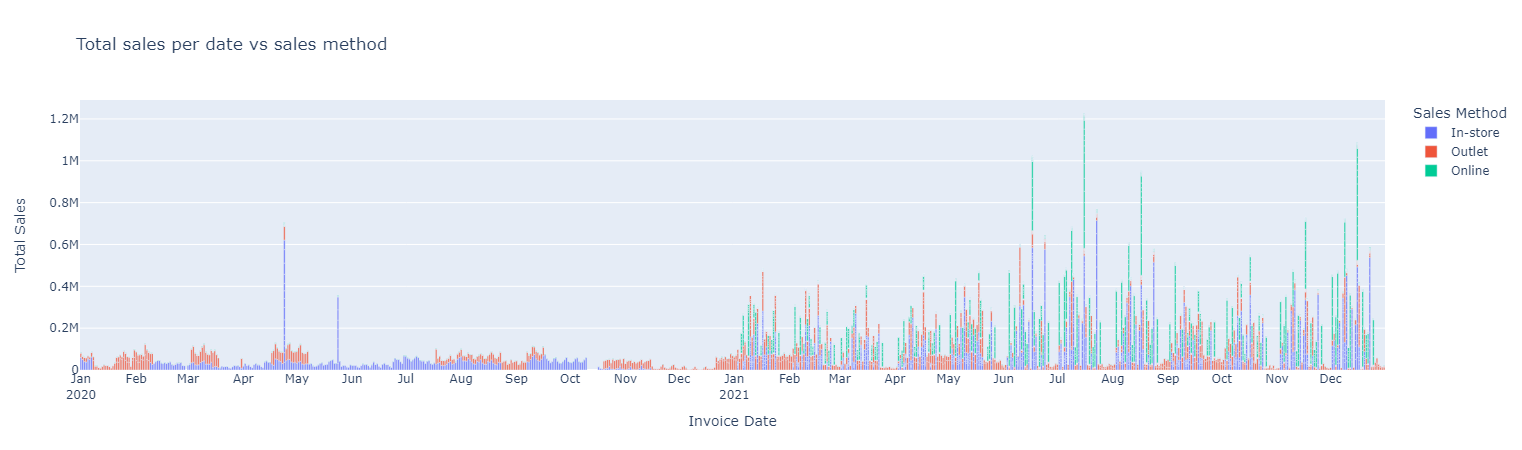

In [106]:
#Total sales per region vs sales method'
fig = px.bar(df, x="Region", y="Total Sales", text = "Total Sales",  color="Sales Method",        
              title='Sales per region')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

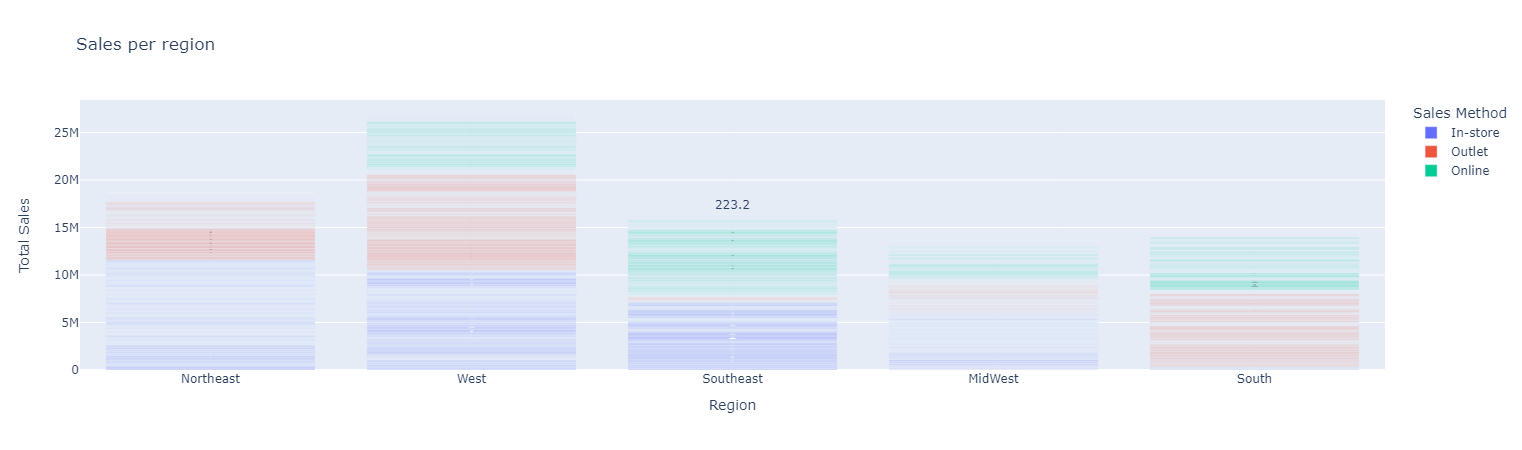

In [107]:
#Sales per month vs sales method
fig = px.bar(df, x="Month", y="Total Sales",text = "Total Sales", color="Sales Method",        
              title='Sales per month vs sales method')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

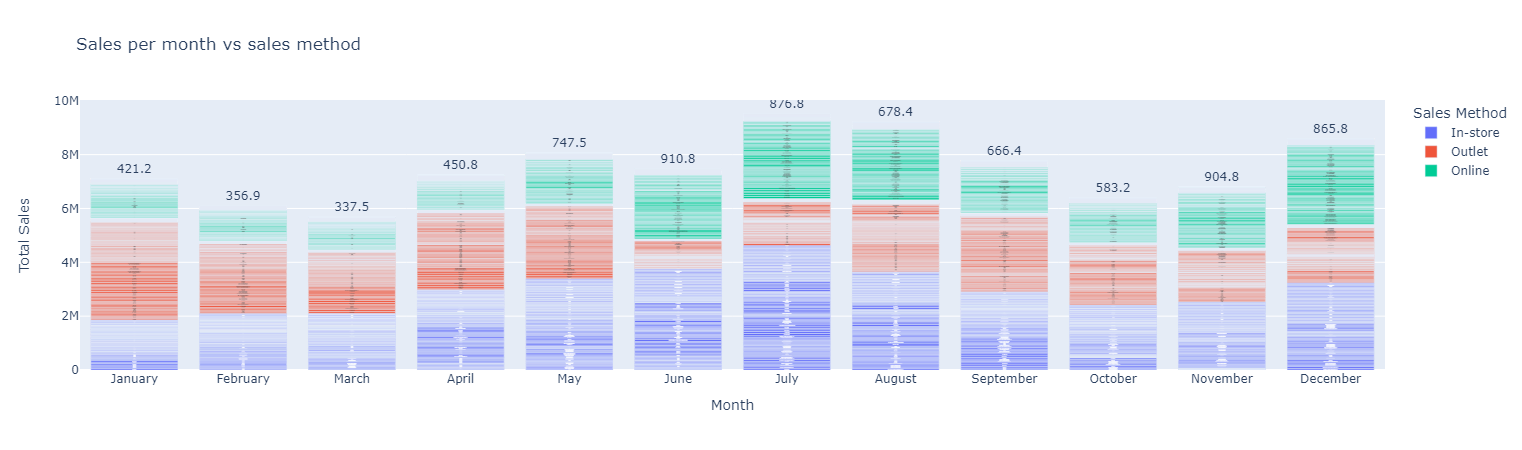

In [108]:
fig = px.scatter(df, x="Total Sales", y="Units Sold", color="Sales Method")
fig.show()

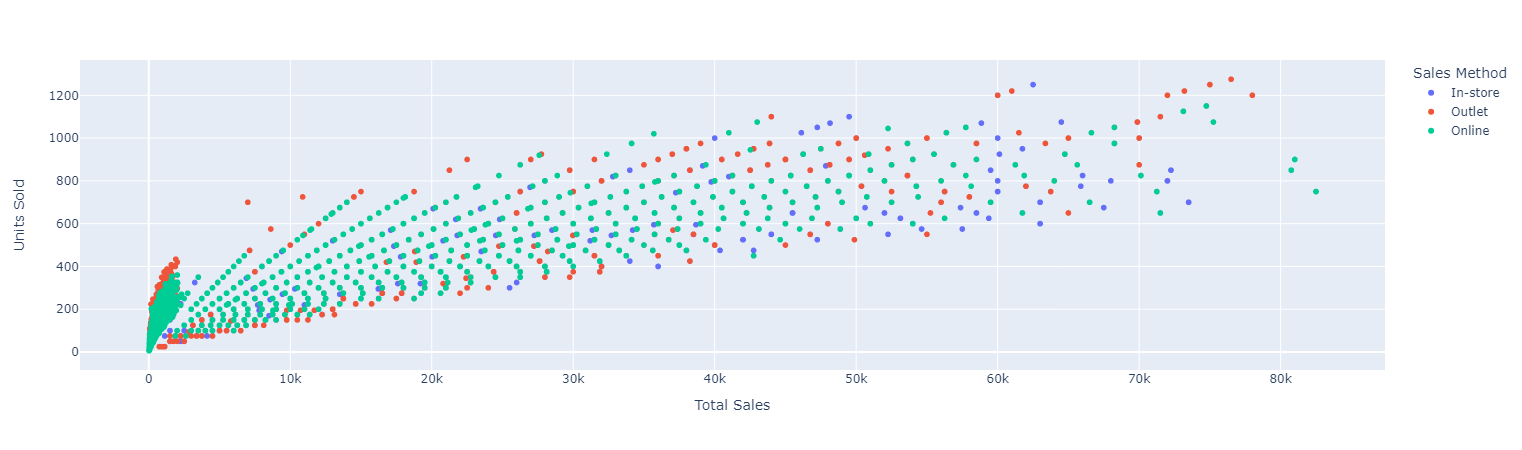

In [109]:
# Profit per sales method
fig = px.pie(df, values='Operating Profit', names='Sales Method', title='Sales per sales method')
fig.show()

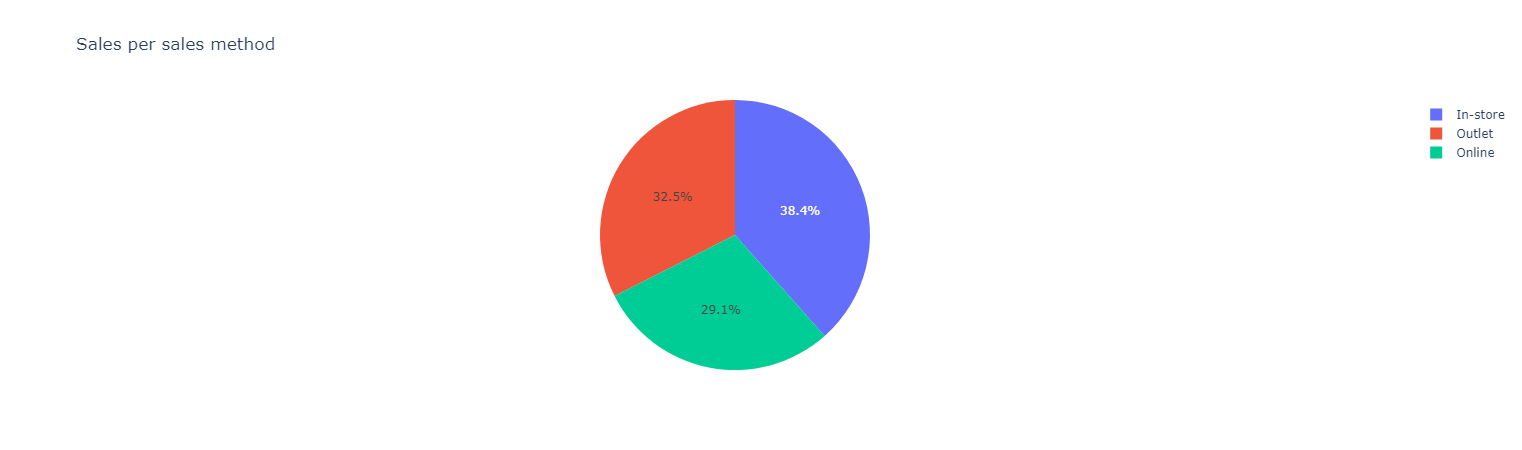

In [110]:
#Total Sales per year
fig = px.pie(df, values='Total Sales', names='Year', title='sales per year')
fig.show()

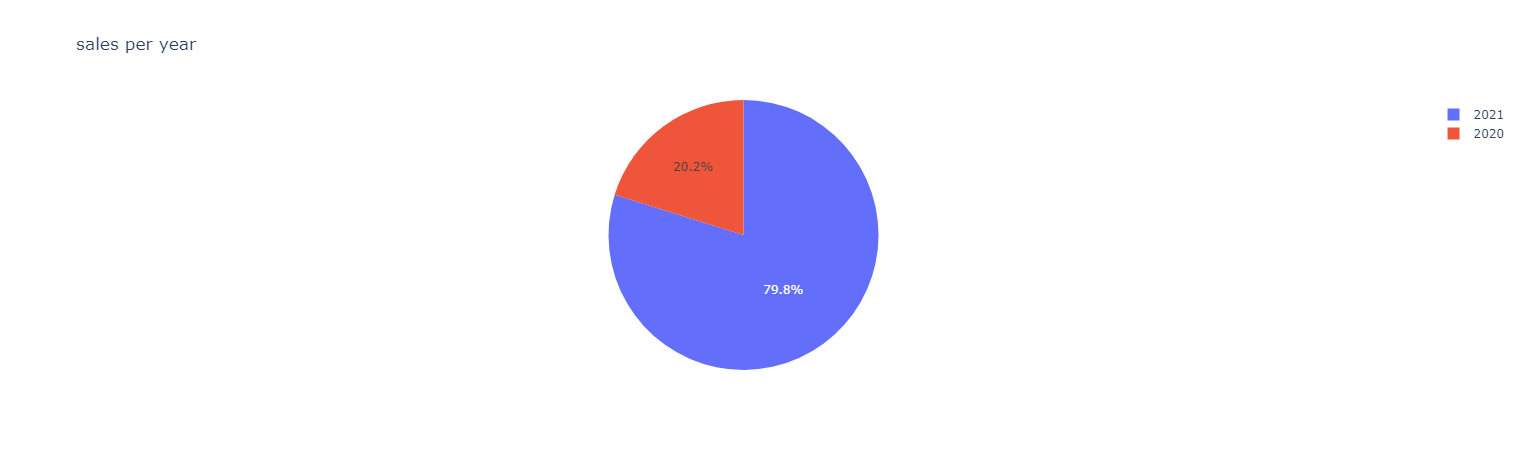

In [111]:
fig = px.ecdf(df, x="Total Sales", color="Sales Method")
fig.show()

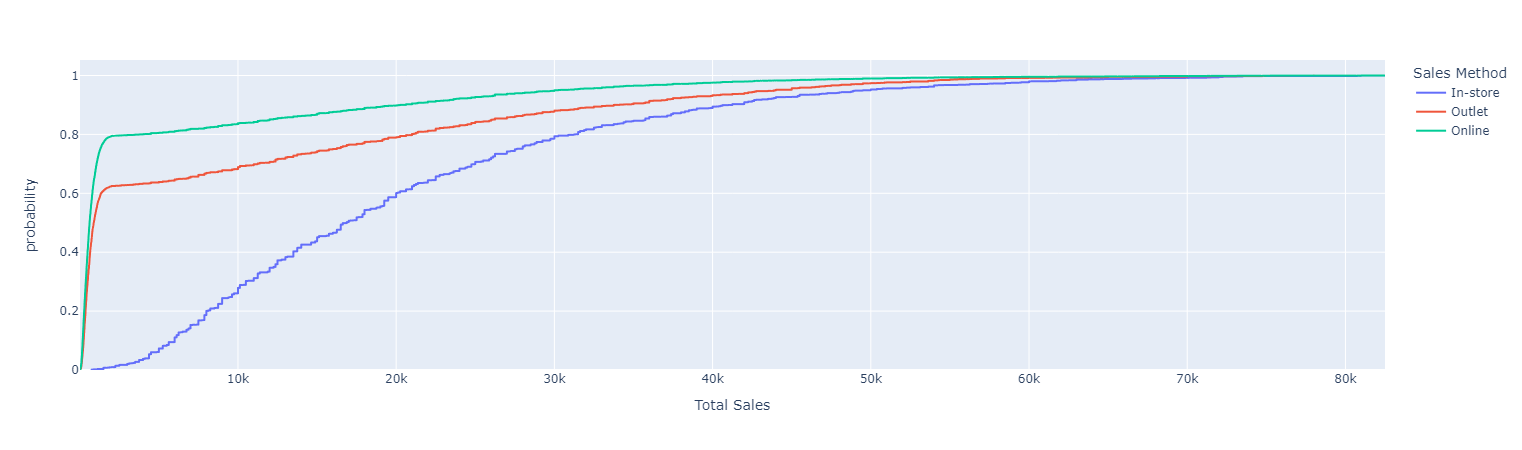

In [112]:
# using sequencial color for sales method scheme
fig = px.bar(df,  x='Total Sales', y='Product', text = "Total Sales",  color='Sales Method')
fig.show()

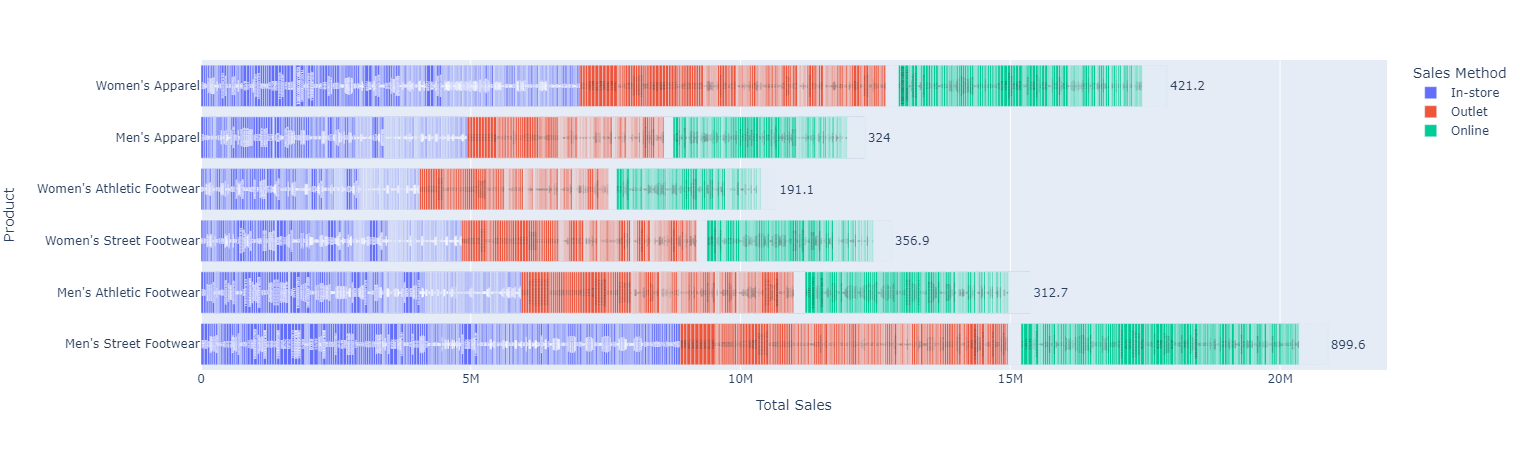

Pivot table the following per State vs Total sales

Month            January      June      July    August  November  December
State                                                                     
Florida          9913.08  19630.01   23682.4  18255.12  13532.72  19283.17
Georgia         11172.59   9722.74  10349.36  10840.76   9600.36  11116.97
Kentucky         7708.07   6321.89   8687.33   8449.57   7165.92    9678.9
North Carolina   9905.43  20939.47  25659.55  23106.57  19142.64  25977.13
South Carolina   12523.3  24559.43  28832.24  26033.21  23072.61  29351.85
Virginia         6454.85  16815.92  20864.95  15033.01  10503.43  15694.38

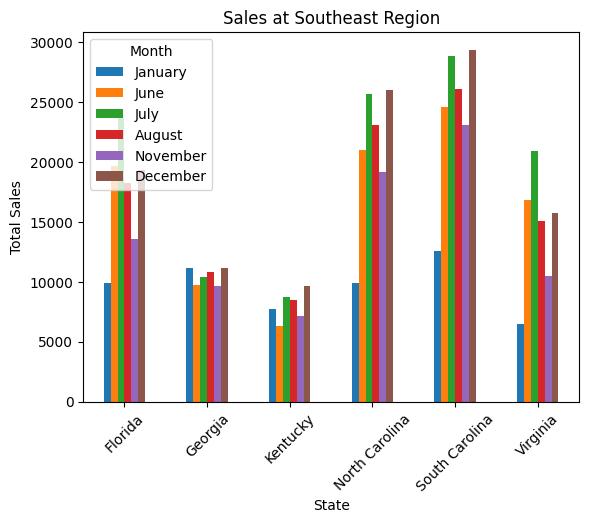

In [113]:
states = df.pivot_table(values='Total Sales', index=['Region','State'], columns='Month', fill_value=0)
region = 'Southeast'

months = ['January','June', 'July', 'August', 'November', 'December']

Southeast_data = states.loc[region, months].round(2)
Southeast_data.plot.bar()
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Sales at Southeast Region')
plt.xticks(rotation=45)
Southeast_data

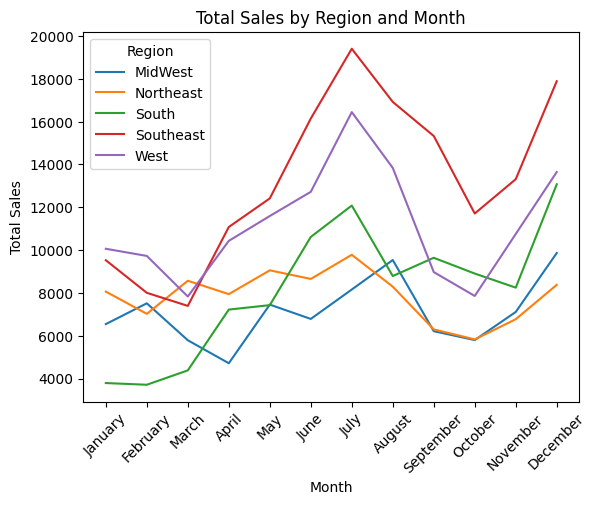

In [114]:
#trends troughout the year per region sales

region_sales = df.pivot_table(values='Total Sales', index='Month', columns='Region', fill_value=0)

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the pivot table with the defined month order
region_sales = region_sales.reindex(month_order)

# Plotting the pivot table
region_sales.plot.line()
plt.xticks(range(len(region_sales.index)), region_sales.index)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Month')
plt.xticks(rotation=45)
# Display the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

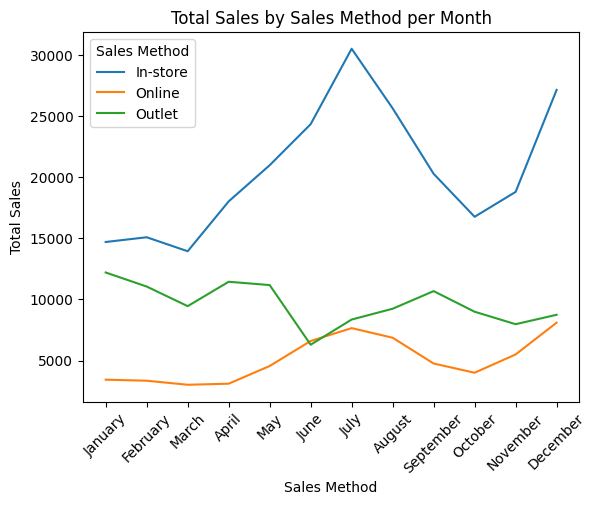

In [115]:
#Sales method trends throughout the year
region_sales = df.pivot_table(values='Total Sales', index='Month', columns='Sales Method', fill_value=0)

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the pivot table with the defined month order
region_sales = region_sales.reindex(month_order)

# Plotting the pivot table
plt.figure(figsize=(12,8))
region_sales.plot.line()
plt.xticks(range(len(region_sales.index)), region_sales.index)

# Adding labels and title
plt.xlabel('Sales Method')
plt.ylabel('Total Sales')
plt.title('Total Sales by Sales Method per Month')
plt.xticks(rotation=45)
# Display the plot
plt.show()

The state with high performances of sales on the good months



## Prepare data for Machine Leaning Model



#### One-hot encoding for dummy variables:

In [116]:
#select features for machine learning
from sklearn.preprocessing import LabelEncoder

data = df[['Retailer','Region','Product','Units Sold','Operating Profit','Price per Unit',  'Sales Method','Profit Margin', 'Total Sales' ]]


# Columns to perform label encoding on
columns_to_encode = ['Retailer','Region','Product','Units Sold','Operating Profit','Price per Unit',  'Sales Method','Profit Margin', 'Total Sales' ]

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each column in columns_to_encode
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Print the DataFrame after label encoding
data.head()
     

C:\Users\Joshua\AppData\Local\Temp\ipykernel_11780\4092576420.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Joshua\AppData\Local\Temp\ipykernel_11780\4092576420.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Joshua\AppData\Local\Temp\ipykernel_11780\4092576420.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

Retailer  Region  Product  Units Sold  Operating Profit  Price per Unit  \
0         1       1        2         356              6445              75   
1         1       1        1         346              6173              75   
2         1       1        5         346              6135              57   
3         1       1        4         337              6113              66   
4         1       1        0         340              6215              91   

   Sales Method  Profit Margin  Total Sales  
0             0            128         3456  
1             0             42         3409  
2             0             60         3336  
3             0             60         3318  
4             0             42         3426



#### Ceating a Model This is formatted as code for machine Learning



In [117]:
#Putting feature variable to x

x = data.drop(['Total Sales'], axis=1)

#Putting  Total sale variable to y

y = data['Total Sales']

In [118]:
x = pd.DataFrame(pre_process.fit_transform(x))

x.head()

0         1         2         3         4         5         6  \
0 -0.931989 -0.680457 -0.292671  1.825568  1.355846  0.371617 -1.641662   
1 -0.931989 -0.680457 -0.878378  1.725449  1.215917  0.371617 -1.641662   
2 -0.931989 -0.680457  1.464449  1.725449  1.196368 -0.365872 -1.641662   
3 -0.931989 -0.680457  0.878742  1.635343  1.185050  0.002873 -1.641662   
4 -0.931989 -0.680457 -1.464084  1.665378  1.237524  1.027162 -1.641662   

          7  
0  0.923438  
1 -1.265676  
2 -0.807490  
3 -0.807490  
4 -1.265676

train test and split

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

scaling

In [120]:
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

LinearRegregression Model

In [121]:
reg = LinearRegression()
reg.fit(scaled_x_train, y_train)

LinearRegression()

In [122]:
linear_intercept = reg.intercept_
linear_coef = reg.coef_

In [123]:
for f,c in zip(x_train, linear_coef):
  print("coef of column", f, "is : ", c)

coef of column 0 is :  7.255106436230796
coef of column 1 is :  -7.513316905373841
coef of column 2 is :  4.743215745907089
coef of column 3 is :  74.6905814499541
coef of column 4 is :  938.7931181268649
coef of column 5 is :  24.781393048114563
coef of column 6 is :  6.203756396307707
coef of column 7 is :  -168.85778275778443


Predicting

In [124]:
y_pred = reg.predict(scaled_x_test)

In [125]:
linear_score = metrics.r2_score(y_test, y_pred)

Matrics

In [126]:
def Evaluation(x_test, y_test, model) :
  y_pred = model.predict(x_test)
  mse = metrics.mean_absolute_error(y_test, y_pred)
  msqe = metrics.mean_squared_error(y_test, y_pred)
  r2_score = metrics.r2_score(y_test, y_pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

  print("mean_absolute_error : ", mse)
  print("mean_squared_error : ", msqe)
  print("root_mean_absolute_error : ", rmse)
  print("r2_score    : ", r2_score)


In [127]:
Evaluation(scaled_x_test, y_test, reg)

mean_absolute_error :  71.78457138760983
mean_squared_error :  9867.909172747419
root_mean_absolute_error :  99.33735034088346
r2_score    :  0.9912999377949023


In [128]:
def compare(y_test, y_pred) :
  compare = pd.DataFrame()
  compare["Actual"] = y_test
  compare["Predict"] = y_pred
  compare["compare"] = abs(y_test - y_pred)

  return compare

**Visualization**
> Let's visualize the prediction distributions, the orange color discribes  the actual values and the blue discribes the prediction values.

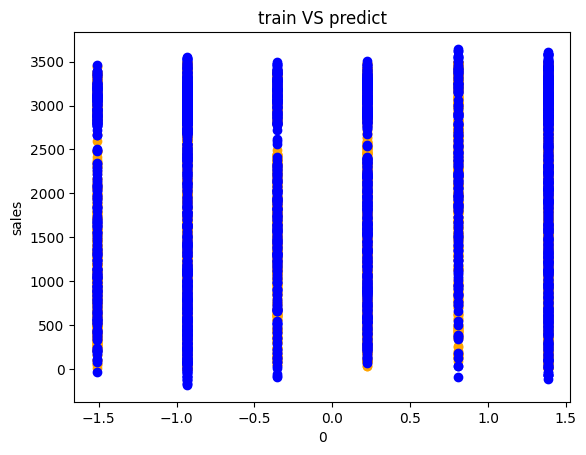

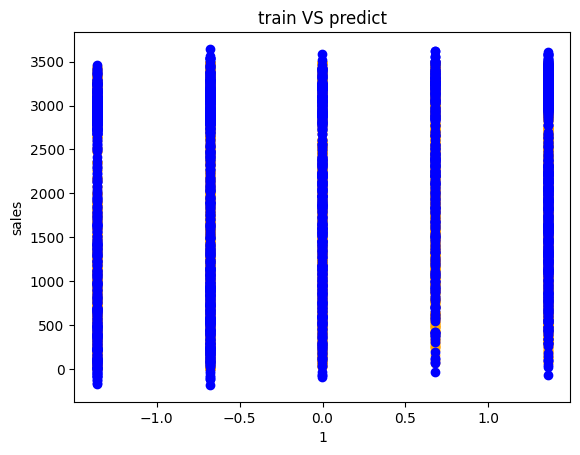

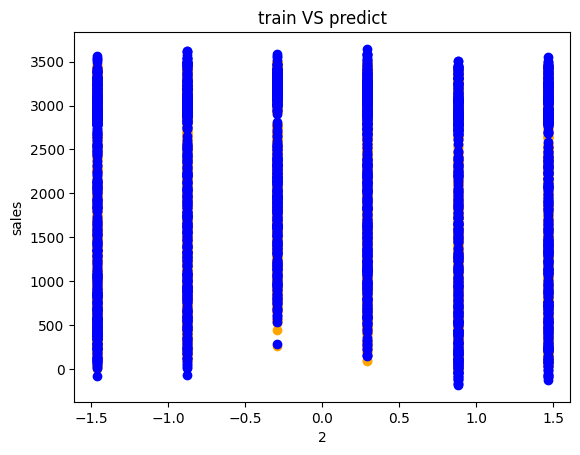

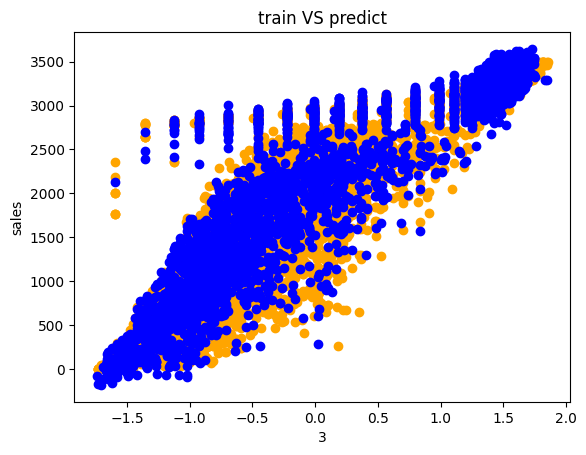

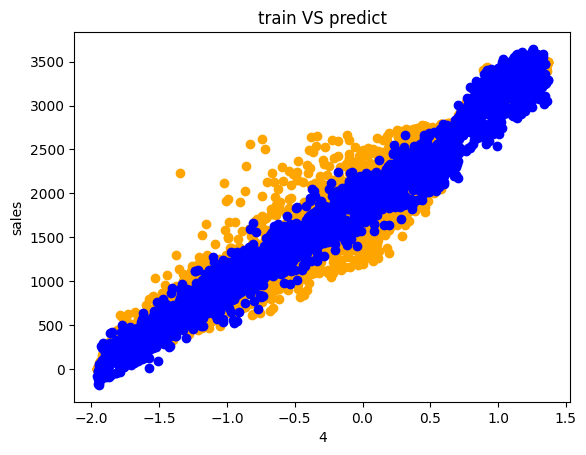

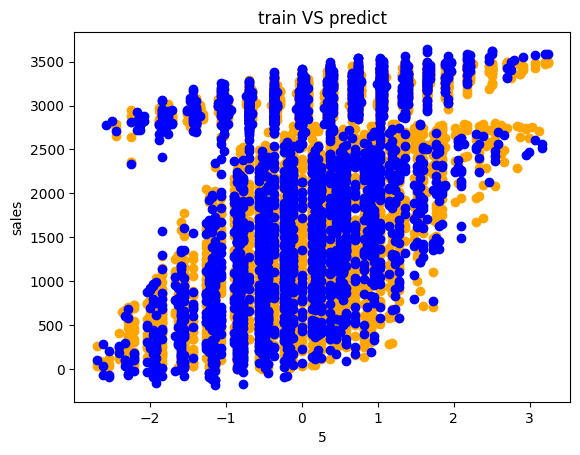

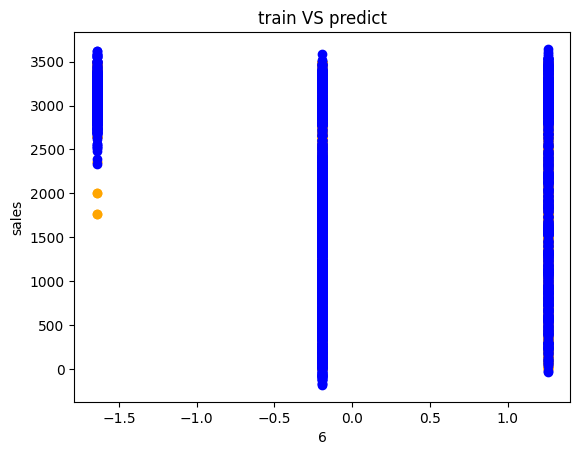

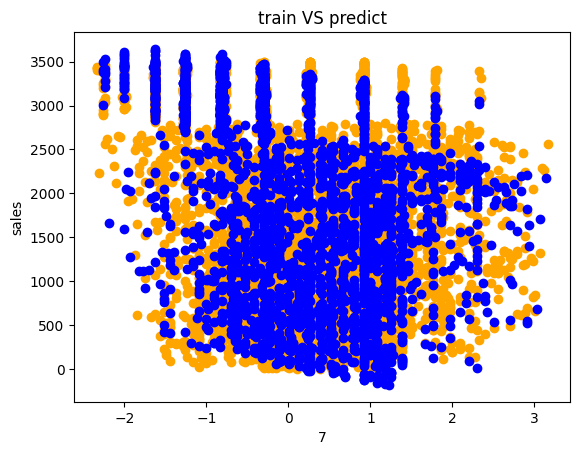

In [129]:
for i in x_train.columns:
    plt.scatter(x_train[i], y_train, color="Orange")
    plt.scatter(x_test[i], y_pred, color="blue")
    plt.title("train VS predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"sales")
    plt.show()

In [130]:
DataFrame = pd.DataFrame(compare(y_test, y_pred))
DataFrame

Actual      Predict     compare
2382    2969  2936.683079   32.316921
917     3053  3068.185177   15.185177
5525    1413  1504.641755   91.641755
5710     580   556.682026   23.317974
6059    1523  1621.227838   98.227838
...      ...          ...         ...
919     3167  3286.625321  119.625321
5874     545   539.307905    5.692095
4348     467   425.201328   41.798672
1340    3142  3153.695243   11.695243
4451    1445  1478.354485   33.354485

[2893 rows x 3 columns]

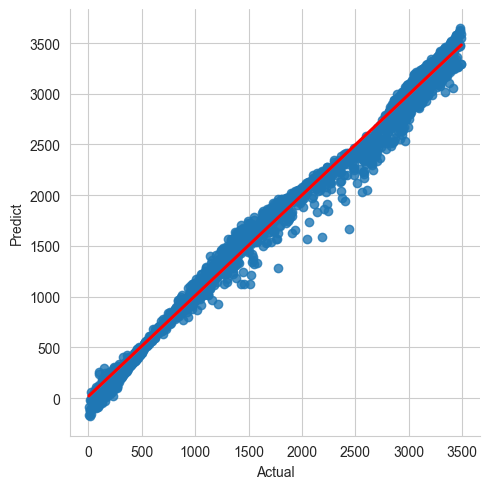

In [131]:

sns.set_style('whitegrid') 
sns.lmplot(x ='Actual', y ='Predict',line_kws=dict(color="r"), data = DataFrame) 

In [132]:
# Import Statsmodels library
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

* Null hypothesis: Sales performance is the same across different sales methods.
* Alternative hypothesis: Sales performance differs among different sales methods.

In [137]:
def anova_analysis(x, y):
    x = "Sales Method"
    y = "Profit Margin"

    df = data[[x, y]]
    
    # Because the OLS function does not recognize spaces, spaces are replaced with underscores(_).
    x = x.replace(" ", "_")
    y = y.replace(" ", "_")
    print("changed name : ", x, ":", y)
    
    df.columns = [x, y]
    
    # define model
    model = ols(f'{y} ~ C({x})', df).fit()
    
    anova_tb = anova_lm(model)
    print(anova_tb)
    
    # alpha is 0.05
    if anova_tb.iloc[0, 4] < 0.05:
        print(f'There is a difference based on the method of sales.')
    else :
        print(f'There is no difference based on the method of sales.')


           

In [138]:
print("Verification of price differences")
anova_analysis("Sales Method", "Price per Unit")
print('\r\n\r\n')
print("=================================================================")
print('\r\n\r\n')
print("Verification of Operating Margin rate")
anova_analysis("Sales Method", "Operating_Margin_rate")

Verification of price differences
changed name :  Sales_Method : Profit_Margin
                     df        sum_sq       mean_sq            F  PR(>F)
C(Sales_Method)     2.0  3.079089e+06  1.539544e+06  1257.413565     0.0
Residual         9639.0  1.180174e+07  1.224374e+03          NaN     NaN
There is a difference based on the method of sales.






Verification of Operating Margin rate
changed name :  Sales_Method : Profit_Margin
                     df        sum_sq       mean_sq            F  PR(>F)
C(Sales_Method)     2.0  3.079089e+06  1.539544e+06  1257.413565     0.0
Residual         9639.0  1.180174e+07  1.224374e+03          NaN     NaN
There is a difference based on the method of sales.



---

### Analysis results:

1. Online: Products with lower unit prices sell well, and the margin rate (profitability) is high.
2. In-store: Products with higher unit prices sell well, but the margin rate (profitability) is low.
3. It would be beneficial to utilize this information in establishing online and offline sales strategies.

---